In [5]:
from pyVIA.core import *
import pandas as pd
import umap
import scanpy as sc

/sc/arion/projects/CommonMind/tereza/conda/envs/ViaEnv/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
cd '/sc/arion/projects/CommonMind/3D_Genome/single_cell/cellranger/Merged_data/'

/sc/arion/projects/CommonMind/3D_Genome/single_cell/cellranger/Merged_data


In [7]:
#----- load h5ad as an input

ad = sc.read( './acc_combo/ACC_SingleR2.h5ad')
ad

/sc/arion/projects/CommonMind/tereza/conda/envs/ViaEnv/lib/python3.7/site-packages/anndata/compat/__init__.py:235: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  FutureWarning,


AnnData object with n_obs × n_vars = 31310 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'gex_barcode', 'atac_barcode', 'is_cell', 'excluded_reason', 'gex_raw_reads', 'gex_mapped_reads', 'gex_conf_intergenic_reads', 'gex_conf_exonic_reads', 'gex_conf_intronic_reads', 'gex_conf_exonic_unique_reads', 'gex_conf_exonic_antisense_reads', 'gex_conf_exonic_dup_reads', 'gex_exonic_umis', 'gex_conf_intronic_unique_reads', 'gex_conf_intronic_antisense_reads', 'gex_conf_intronic_dup_reads', 'gex_intronic_umis', 'gex_conf_txomic_unique_reads', 'gex_umis_count', 'gex_genes_count', 'atac_raw_reads', 'atac_unmapped_reads', 'atac_lowmapq', 'atac_dup_reads', 'atac_chimeric_reads', 'atac_mitochondrial_reads', 'atac_fragments', 'atac_TSS_fragments', 'atac_peak_region_fragments', 'atac_peak_region_cutsites', 'percent.mt', 'nCount_ATAC', 'nFeature_ATAC', 'sex', 'age', 'mitoRatio', 'percent.ribo', 'riboRatio', 'percent.hb', 'log10GenesPerUMI', 'nucleosome_signal', 'nucleosome_percentile', 'TSS

In [10]:
#--- check labels in your data
np.unique(ad.obs['predicted_labels_subclass'])

array(['Astrocyte', 'Endothelial', 'IT', 'LAMP5', 'Microglia', 'OPC',
       'Oligodendrocyte', 'PVALB', 'Pericyte', 'VIP'], dtype=object)

In [11]:
nover_labels = ad.obs['predicted_labels_subclass']

umap = ad.obsm['X_umap.rnah']
adata_counts = sc.AnnData(ad.X)  # ad.X is filtered, lognormalized,scaled// whereas ad.raw.X is the filtered but not pre-processed
adata_counts.obs_names = ad.obs_names
adata_counts.var_names = ad.var_names
sc.tl.pca(adata_counts, svd_solver='arpack', n_comps=200)
true_label = nover_labels

/sc/arion/projects/CommonMind/tereza/conda/envs/ViaEnv/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  after removing the cwd from sys.path.


In [ ]:
#---------- select starting point

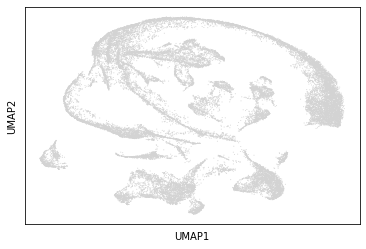

In [38]:
sc.pl.umap(ad, groups = "predicted_labels_subclass")

In [36]:
vect = ['age', 'predicted_labels_subclass']
ad.obs[vect]


age predicted_labels_subclass
ACC_4413_AAACCGAAGTCGCAAT-1  0y                 Astrocyte
ACC_4413_AAACCGGCAGCAAGGC-1  0y                       OPC
ACC_4413_AAACGGATCCCTCAGT-1  0y                     PVALB
ACC_4413_AAACGGATCCCTTGCG-1  0y                 Microglia
ACC_4413_AAACGTACATCGCTCC-1  0y                 Microglia
...                          ..                       ...
ACC_5977_TTTGTGGCAGTACCGT-1  6y                        IT
ACC_5977_TTTGTGTTCCCAGTAG-1  6y                 Microglia
ACC_5977_TTTGTGTTCTCCATAT-1  6y                       OPC
ACC_5977_TTTGTTGGTAGTAAGA-1  6y                       OPC
ACC_5977_TTTGTTGGTATTCGCT-1  6y           Oligodendrocyte

[31310 rows x 2 columns]

In [59]:
#merg = np.concatenate(list(ad.obs['age']).values, list(ad.obs['predicted_labels_subclass']).values)

a = list(ad.obs['age'].values)
b = list(ad.obs['predicted_labels_subclass'].values)
df = pd.DataFrame()
df['a'] = a; df['b'] = b
df['c'] = df['a']+str('_')+df['b']
df


a                b                   c
0      0y        Astrocyte        0y_Astrocyte
1      0y              OPC              0y_OPC
2      0y            PVALB            0y_PVALB
3      0y        Microglia        0y_Microglia
4      0y        Microglia        0y_Microglia
...    ..              ...                 ...
31305  6y               IT               6y_IT
31306  6y        Microglia        6y_Microglia
31307  6y              OPC              6y_OPC
31308  6y              OPC              6y_OPC
31309  6y  Oligodendrocyte  6y_Oligodendrocyte

[31310 rows x 3 columns]

In [62]:
ad.obs['merged'] = df['c'].values
ad.obs['merged']

ACC_4413_AAACCGAAGTCGCAAT-1          0y_Astrocyte
ACC_4413_AAACCGGCAGCAAGGC-1                0y_OPC
ACC_4413_AAACGGATCCCTCAGT-1              0y_PVALB
ACC_4413_AAACGGATCCCTTGCG-1          0y_Microglia
ACC_4413_AAACGTACATCGCTCC-1          0y_Microglia
                                      ...        
ACC_5977_TTTGTGGCAGTACCGT-1                 6y_IT
ACC_5977_TTTGTGTTCCCAGTAG-1          6y_Microglia
ACC_5977_TTTGTGTTCTCCATAT-1                6y_OPC
ACC_5977_TTTGTTGGTAGTAAGA-1                6y_OPC
ACC_5977_TTTGTTGGTATTCGCT-1    6y_Oligodendrocyte
Name: merged, Length: 31310, dtype: object

2022-08-02 15:27:23.077105	Running VIA over input data of 31310 (samples) x 100 (features)
2022-08-02 15:27:32.466850	Finished global pruning of 30-knn graph used for clustering. Kept 47.4 % of edges. 
2022-08-02 15:27:32.653561	Number of connected components used for clustergraph  is 1
2022-08-02 15:27:34.387380	The number of components in the original full graph is 1
2022-08-02 15:27:34.387479	For downstream visualization purposes we are also constructing a low knn-graph 
2022-08-02 15:27:38.563743	Commencing community detection
2022-08-02 15:27:39.197314	Finished running Leiden algorithm. Found 1486 clusters.
2022-08-02 15:27:39.206415	Merging 1417 very small clusters (<10)
2022-08-02 15:27:39.225224	Finished detecting communities. Found 69 communities
2022-08-02 15:27:39.227085	Making cluster graph. Global cluster graph pruning level: 0.15
2022-08-02 15:27:39.398728	Graph has 1 connected components before pruning
2022-08-02 15:27:39.401884	Graph has 1 connected components before pr

/sc/arion/projects/CommonMind/tereza/conda/envs/ViaEnv/lib/python3.7/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


2022-08-02 15:27:39.800228	The root index, 0 provided by the user belongs to cluster number 42                                  and corresponds to cell type Astrocyte
2022-08-02 15:27:39.810284	Computing lazy-teleporting expected hitting times
2022-08-02 15:27:42.559654	Identifying terminal clusters corresponding to unique lineages...
2022-08-02 15:27:42.560078	Closeness:[16, 26, 48, 51, 60, 61]
2022-08-02 15:27:42.560105	Betweenness:[2, 4, 5, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 25, 26, 27, 29, 30, 31, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 48, 49, 51, 52, 53, 54, 55, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]
2022-08-02 15:27:42.560129	Out Degree:[4, 5, 10, 11, 12, 13, 17, 21, 22, 25, 26, 27, 28, 30, 31, 33, 34, 38, 39, 40, 41, 44, 45, 47, 48, 49, 51, 53, 54, 55, 57, 59, 60, 61, 62, 63, 66, 67, 68]
2022-08-02 15:27:42.562896	Terminal clusters corresponding to unique lineages in this component are [4, 5, 10, 11, 12, 13, 16, 17, 21, 27, 30, 33, 34, 39, 40, 44, 4

/sc/arion/projects/CommonMind/tereza/conda/envs/ViaEnv/lib/python3.7/site-packages/pyVIA/core.py:3234: RuntimeWarning: invalid value encountered in true_divide
  bp_array = bp_array / bp_array.sum(axis=1)[:, None]


2022-08-02 15:28:09.103545	Graph has 1 connected components before pruning
2022-08-02 15:28:09.106184	Graph has 3 connected components before pruning n_nonz 2 2
2022-08-02 15:28:09.117782	Graph has 3 connected components after reconnecting
2022-08-02 15:28:09.118013	62.8% links trimmed from local pruning relative to start
2022-08-02 15:28:09.118068	79.5% links trimmed from global pruning relative to start


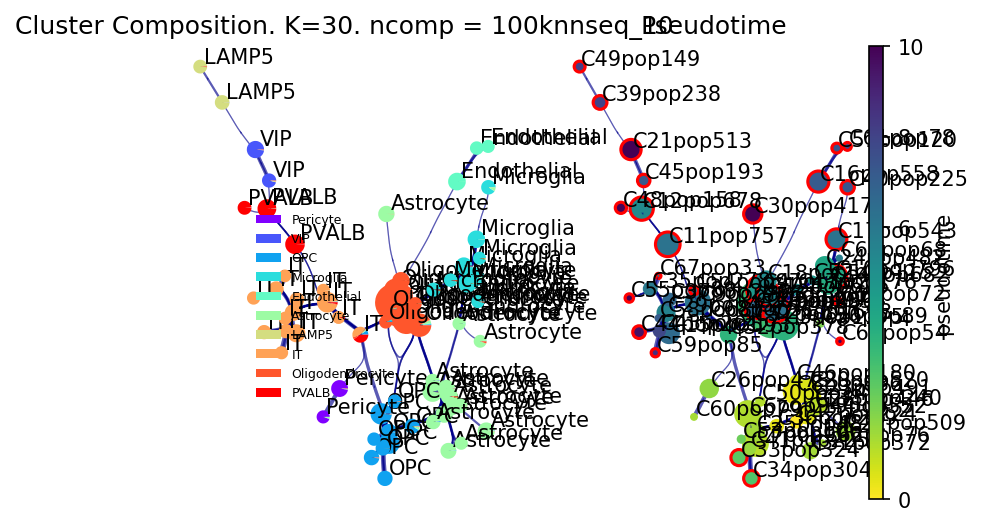

2022-08-02 15:28:16.481393	Time elapsed 49.5 seconds


In [66]:
#---------------- run parameters for VIA
import pyVIA.core as via

ncomps=100#80
knn=30
v0_random_seed=4
root_user = [0] #the index of a cell belonging to the desired cell type
dataset = ''

'''
#Note, if you decide to choose a cell type as a root, then you need to set the dataset as 'group'
'''

v0 = via.VIA(adata_counts.obsm['X_pca'][:, 0:ncomps], true_label, jac_std_global=0.15,
             dist_std_local=1, knn=knn, too_big_factor=0.3,
             root_user=root_user, dataset=dataset, preserve_disconnected=True,
             random_seed=v0_random_seed,is_coarse=True,pseudotime_threshold_TS=20,
             neighboring_terminal_states_threshold=3)

v0.run_VIA()

In [88]:
#ad.var['features']
ad.var['_index'] 


0          LINC01342
1               HES5
2       TNFRSF14-AS1
3             PRDM16
4               TP73
            ...     
2995          MT-ND3
2996          MT-ND4
2997          MT-ND5
2998          MT-CYB
2999      AC011043.2
Name: _index, Length: 3000, dtype: object

In [80]:
df_

0          1         2         3         4         5         6  \
0     -0.013717  10.342356 -0.046995 -0.455079 -0.051678 -0.039606 -0.040573   
1     -0.006815  -0.282579 -0.037676 -0.381774 -0.040292 -0.029852 -0.031461   
2     -0.035197  -0.480922 -0.075545 -0.614935 -0.085815 -0.069360 -0.068543   
3     -0.007936  -0.292470 -0.039191 -0.394461 -0.042149 -0.031439 -0.032942   
4     -0.012119  -0.327905 -0.044841 -0.439140 -0.049055 -0.037353 -0.038466   
...         ...        ...       ...       ...       ...       ...       ...   
31305  0.000218  -0.216931 -0.028180 -0.295578 -0.028606 -0.019900 -0.022183   
31306 -0.000541  -0.224297 -0.029203 -0.305396 -0.029867 -0.020972 -0.023181   
31307 -0.058375  -0.574404 -0.104760 -0.706507 -0.119126 -0.099520 -0.097293   
31308 -0.054670  -0.562536 -0.100239 -0.695579 -0.114100 -0.094876 -0.092833   
31309 -0.006038  -0.275632 -0.036626 -0.372810 -0.039004 -0.028753 -0.030435   

               7         8         9  ...      2990      2991      2992  \
0      -0.302281 -0.322927 -0.060903  ... -0.822475 -0.966136 -1.106703   
1      -0.258346 -0.266546 -0.048520  ... -0.717713 -0.858927 -1.005828   
2      -0.413020 -0.459641 -0.097635  ... -0.251477 -0.362006 -0.185272   
3       6.285968 -0.276111 -0.050543  ... -0.737199 -0.879556 -1.025945   
4      10.319896  7.673978 -0.058055  ... -0.801308 -0.945222 -1.087736   
...          ...       ...       ...  ...       ...       ...       ...   
31305  -0.209560 -0.203137 -0.035768  ... -0.571239 -0.694840 -0.833966   
31306  -0.215010 -0.210247 -0.037146  ... -0.589065 -0.715584 -0.856824   
31307  -0.493516  0.315593 -0.132622  ... -1.053314 -1.168220 -1.199667   
31308  -0.482887 -0.540318 -0.127410  ... -1.046608 -1.042352 -1.102461   
31309  -0.253154 -0.259830 -0.047117  ... -0.703608 -0.843806 -0.990867   

           2993      2994      2995      2996      2997      2998      2999  
0     -1.012085 -0.421013 -1.017523 -0.988014 -0.553380 -0.794021 -0.045230  
1     -0.905943 -0.925158 -0.910013 -0.880645 -0.464262 -0.687426 -0.035829  
2     -0.477499 -0.367804 -1.172339 -0.622631  0.574505 -0.630635 -0.074009  
3      0.091896 -0.032429 -0.930554  0.236585 -0.480197 -0.707454 -0.037357  
4     -0.991599 -1.009317 -0.996396 -0.967010 -0.534626 -0.772708 -0.043058  
...         ...       ...       ...       ...       ...       ...       ...  
31305 -0.738588  1.161269 -0.748695 -0.717566 -0.351014 -0.534490 -0.026248  
31306  1.186598 -0.777177  1.450584 -0.738112 -0.364310 -0.553296 -0.027279  
31307 -1.108673 -1.208666 -1.111143 -1.192687 -0.800218 -1.017369 -0.103406  
31308 -1.091128 -0.918889 -0.959896 -1.063096 -0.454002 -1.011154 -0.098861  
31309 -0.890755 -0.910017 -0.894998 -0.865558 -0.452881 -0.672876 -0.034770  

[31310 rows x 3000 columns]

In [84]:
df_ = pd.DataFrame(ad.X)
df_.columns = [i for i in ad.var['_index']]
 ['ZNF385D', 'VCAN', 'FGF13']
df_

LINC01342       HES5  TNFRSF14-AS1    PRDM16      TP73      ESPN  \
0      -0.013717  10.342356     -0.046995 -0.455079 -0.051678 -0.039606   
1      -0.006815  -0.282579     -0.037676 -0.381774 -0.040292 -0.029852   
2      -0.035197  -0.480922     -0.075545 -0.614935 -0.085815 -0.069360   
3      -0.007936  -0.292470     -0.039191 -0.394461 -0.042149 -0.031439   
4      -0.012119  -0.327905     -0.044841 -0.439140 -0.049055 -0.037353   
...          ...        ...           ...       ...       ...       ...   
31305   0.000218  -0.216931     -0.028180 -0.295578 -0.028606 -0.019900   
31306  -0.000541  -0.224297     -0.029203 -0.305396 -0.029867 -0.020972   
31307  -0.058375  -0.574404     -0.104760 -0.706507 -0.119126 -0.099520   
31308  -0.054670  -0.562536     -0.100239 -0.695579 -0.114100 -0.094876   
31309  -0.006038  -0.275632     -0.036626 -0.372810 -0.039004 -0.028753   

            CA6     SLC2A5    PIK3CD   TNFRSF8  ...    MT-ND2    MT-CO1  \
0     -0.040573  -0.302281 -0.322927 -0.060903  ... -0.822475 -0.966136   
1     -0.031461  -0.258346 -0.266546 -0.048520  ... -0.717713 -0.858927   
2     -0.068543  -0.413020 -0.459641 -0.097635  ... -0.251477 -0.362006   
3     -0.032942   6.285968 -0.276111 -0.050543  ... -0.737199 -0.879556   
4     -0.038466  10.319896  7.673978 -0.058055  ... -0.801308 -0.945222   
...         ...        ...       ...       ...  ...       ...       ...   
31305 -0.022183  -0.209560 -0.203137 -0.035768  ... -0.571239 -0.694840   
31306 -0.023181  -0.215010 -0.210247 -0.037146  ... -0.589065 -0.715584   
31307 -0.097293  -0.493516  0.315593 -0.132622  ... -1.053314 -1.168220   
31308 -0.092833  -0.482887 -0.540318 -0.127410  ... -1.046608 -1.042352   
31309 -0.030435  -0.253154 -0.259830 -0.047117  ... -0.703608 -0.843806   

         MT-CO2   MT-ATP6    MT-CO3    MT-ND3    MT-ND4    MT-ND5    MT-CYB  \
0     -1.106703 -1.012085 -0.421013 -1.017523 -0.988014 -0.553380 -0.794021   
1     -1.005828 -0.905943 -0.925158 -0.910013 -0.880645 -0.464262 -0.687426   
2     -0.185272 -0.477499 -0.367804 -1.172339 -0.622631  0.574505 -0.630635   
3     -1.025945  0.091896 -0.032429 -0.930554  0.236585 -0.480197 -0.707454   
4     -1.087736 -0.991599 -1.009317 -0.996396 -0.967010 -0.534626 -0.772708   
...         ...       ...       ...       ...       ...       ...       ...   
31305 -0.833966 -0.738588  1.161269 -0.748695 -0.717566 -0.351014 -0.534490   
31306 -0.856824  1.186598 -0.777177  1.450584 -0.738112 -0.364310 -0.553296   
31307 -1.199667 -1.108673 -1.208666 -1.111143 -1.192687 -0.800218 -1.017369   
31308 -1.102461 -1.091128 -0.918889 -0.959896 -1.063096 -0.454002 -1.011154   
31309 -0.990867 -0.890755 -0.910017 -0.894998 -0.865558 -0.452881 -0.672876   

       AC011043.2  
0       -0.045230  
1       -0.035829  
2       -0.074009  
3       -0.037357  
4       -0.043058  
...           ...  
31305   -0.026248  
31306   -0.027279  
31307   -0.103406  
31308   -0.098861  
31309   -0.034770  

[31310 rows x 3000 columns]

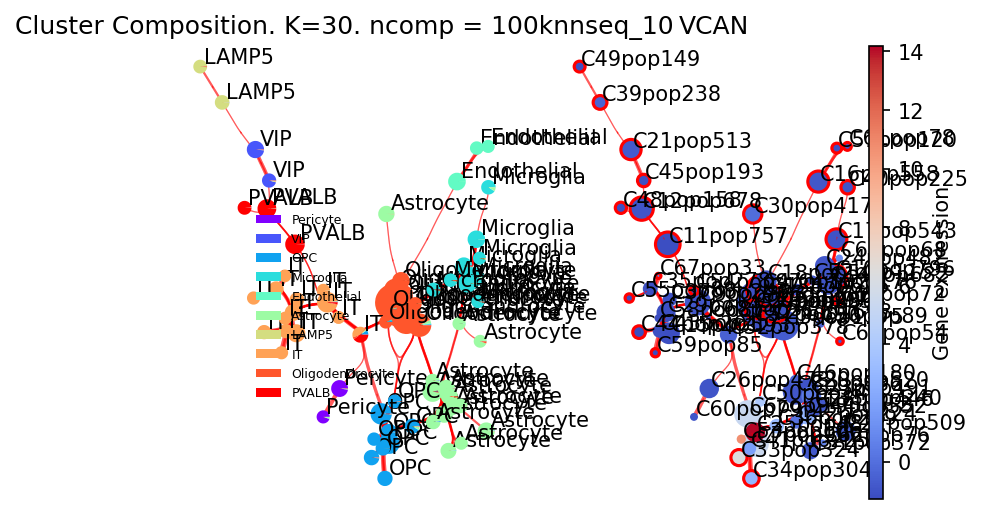

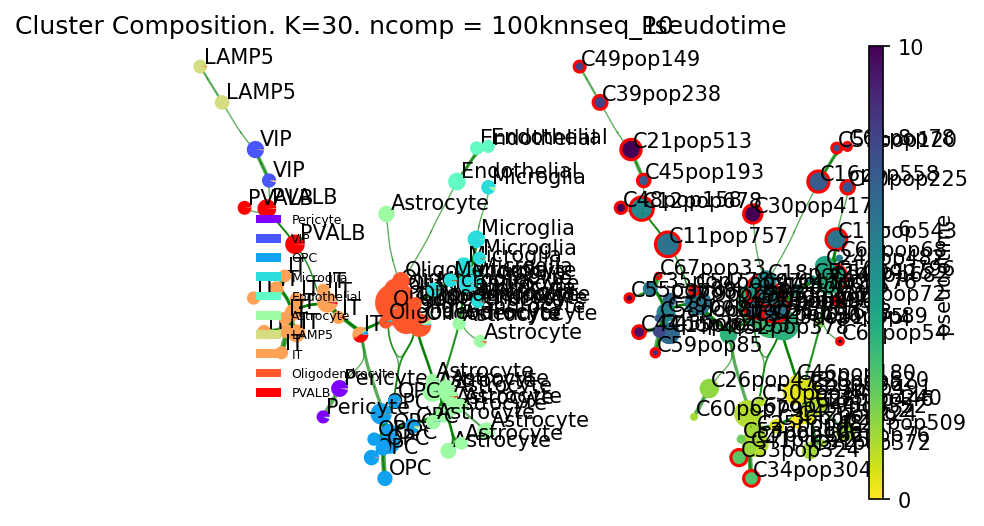

In [92]:
gene_list_magic = ['ZNF385D', 'VCAN', 'FGF13']
df_magic = v0.do_impute(df_, magic_steps=3, gene_list=gene_list_magic)
df_magic['parc'] = v0.labels
df_magic_cluster = df_magic.groupby('parc', as_index=True).mean()

# Draw_piechart plots both the cell type composition as well as a clustergraph colored by pseudotime or gene expression
v0.draw_piechart_graph(type_data='gene', gene_exp=df_magic_cluster['VCAN'].values, title='VCAN', edge_color='red')
v0.draw_piechart_graph(type_data='pt', title='pseudotime', edge_color='green')


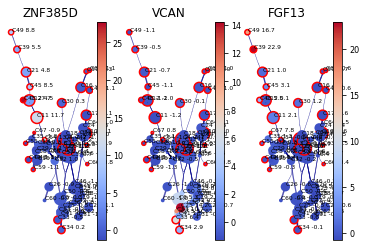

In [95]:
# Draw_clustergraph does not plot the pie-graph clutsergraph and accepts a dataframe as input. Here we plot just the first three genes in the gene_list_magic list
via.draw_clustergraph(via_coarse=v0, type_data='gene', gene_exp=df_magic_cluster, gene_list=gene_list_magic[0:3], arrow_head=0.1)


100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |#######################

2022-08-02 15:53:53.667962	Super cluster 4 is a super terminal with sub_terminal cluster 4
2022-08-02 15:53:53.668272	Super cluster 5 is a super terminal with sub_terminal cluster 5
2022-08-02 15:53:53.668453	Super cluster 10 is a super terminal with sub_terminal cluster 10
2022-08-02 15:53:53.668614	Super cluster 11 is a super terminal with sub_terminal cluster 11
2022-08-02 15:53:53.668742	Super cluster 12 is a super terminal with sub_terminal cluster 12
2022-08-02 15:53:53.668870	Super cluster 13 is a super terminal with sub_terminal cluster 13
2022-08-02 15:53:53.669005	Super cluster 16 is a super terminal with sub_terminal cluster 16
2022-08-02 15:53:53.669134	Super cluster 17 is a super terminal with sub_terminal cluster 17
2022-08-02 15:53:53.669333	Super cluster 21 is a super terminal with sub_terminal cluster 21
2022-08-02 15:53:53.669481	Super cluster 27 is a super terminal with sub_terminal cluster 27
2022-08-02 15:53:53.669618	Super cluster 30 is a super terminal with sub_t

'\n##In case we are unable to do a tsne/umap of our entire dataset due to high runtime, it is possible to visualize Via (run on the full dataset) on a subset of cells used for visualization. One simply has to retain the indexes of the cells used for the embedding\n##by changing "size" to a number less than len(labels), you can choose to compute your embedding on just idx samples\nidx = np.random.randint(len(v0.labels), size=len(v0.labels))\n\nvia.draw_trajectory_gams(via_coarse=v0, via_fine=v0, embedding=tsnem[idx], idx = idx, draw_all_curves=False)\n\n##visualizeLINEAGE EVOLUTION PATHS when only a subset of the embedding points are available\n\nvia.draw_sc_evolution_trajectory_dijkstra(via_coarse=v0, via_fine=v0, embedding=tsnem[idx], idx = idx)\n'

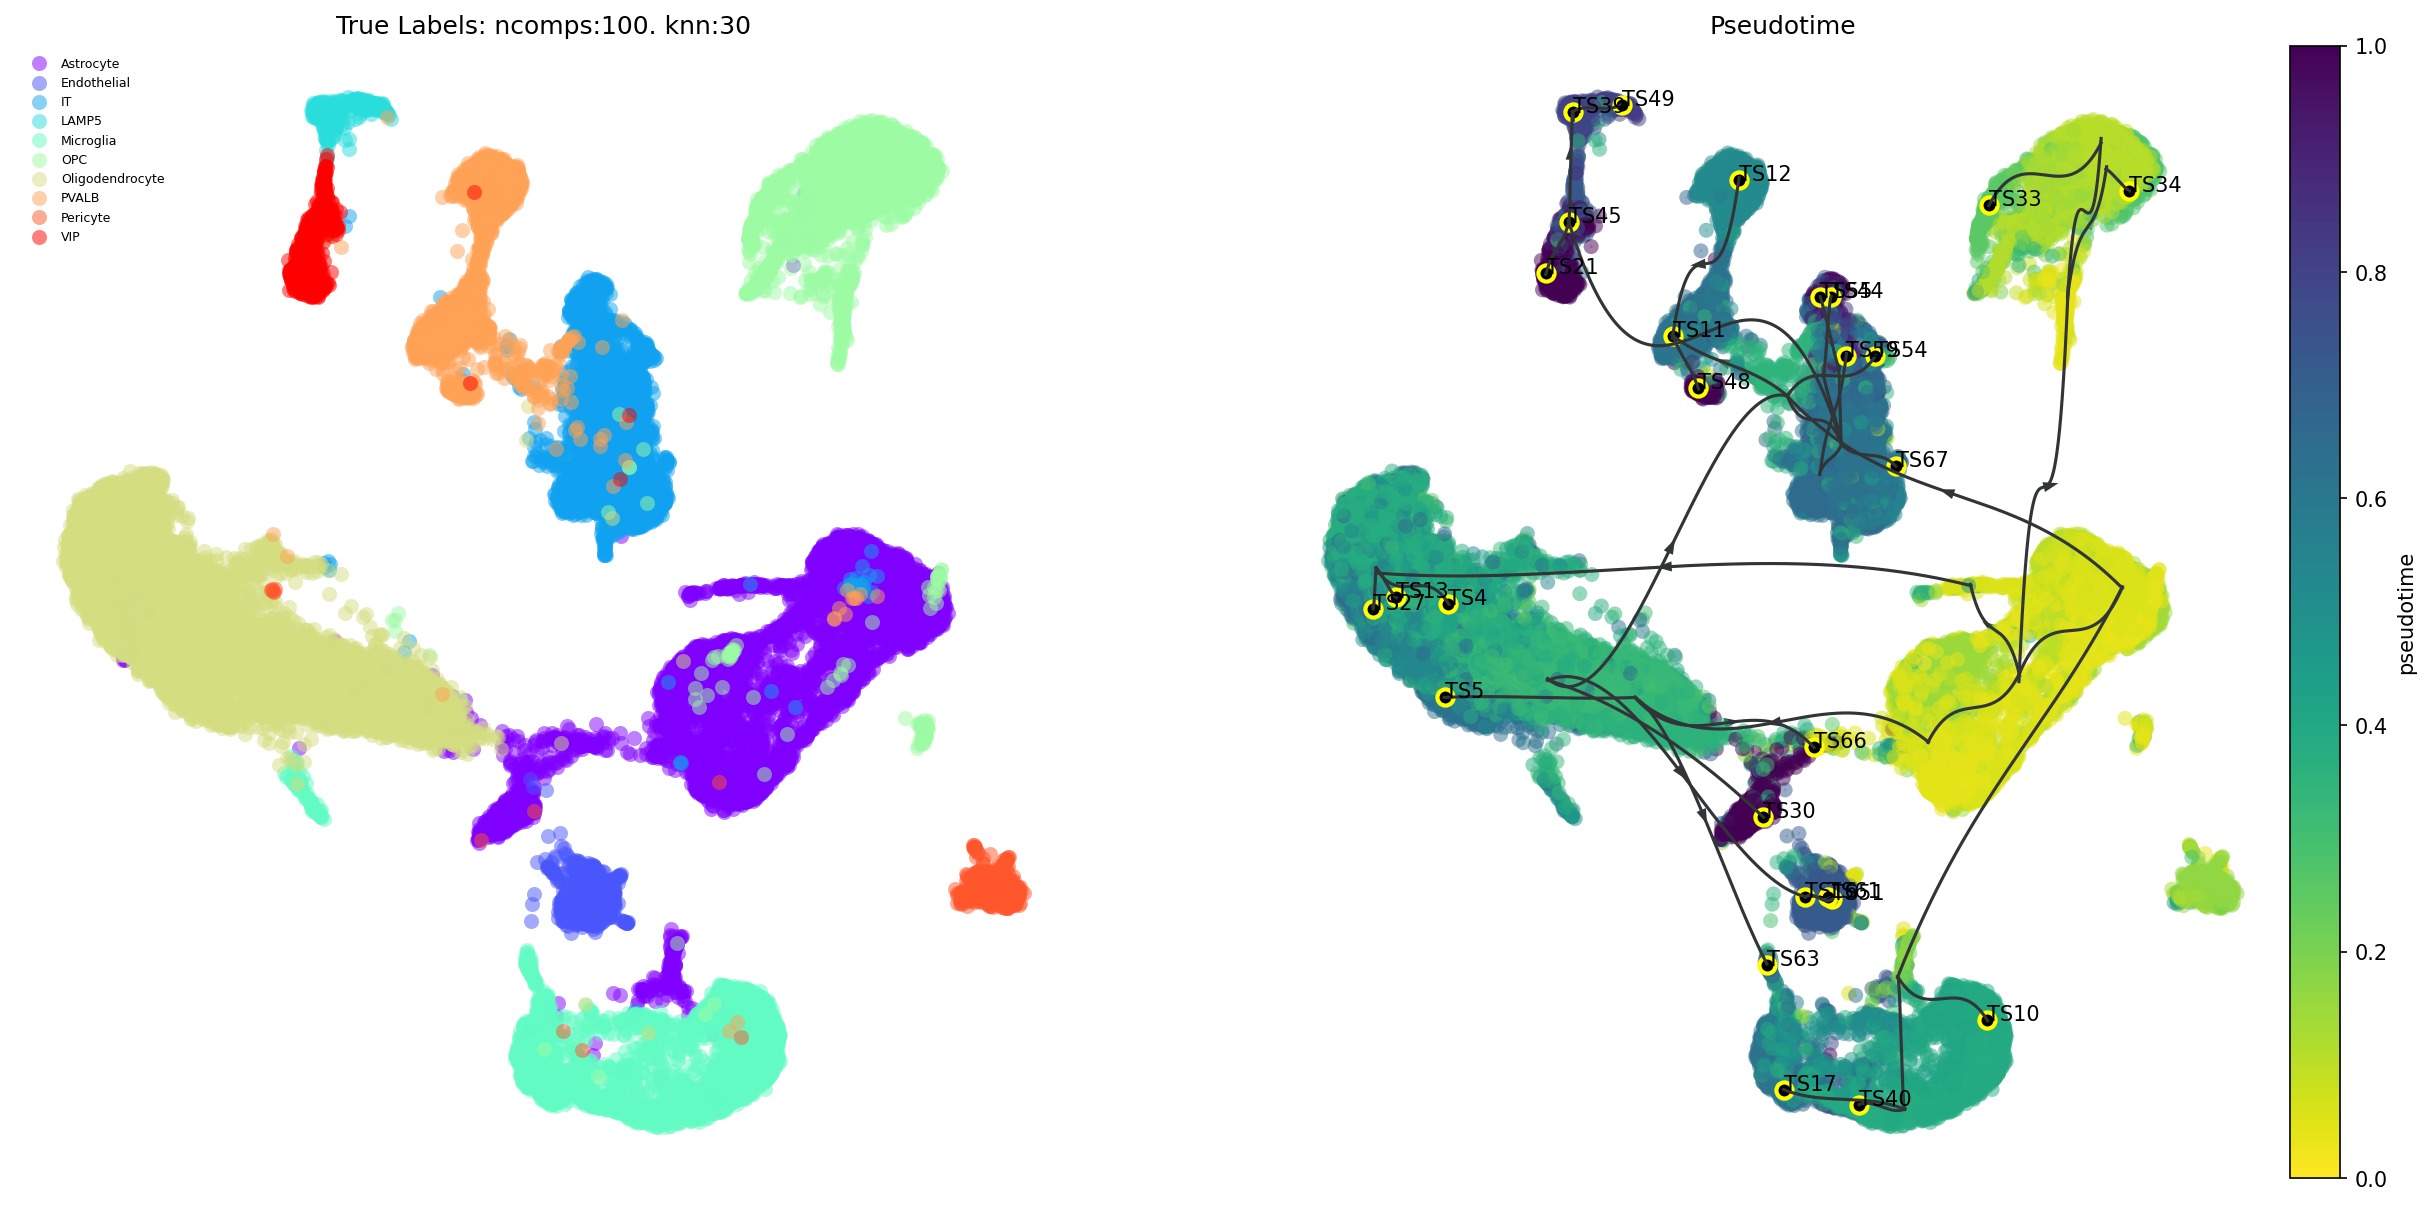

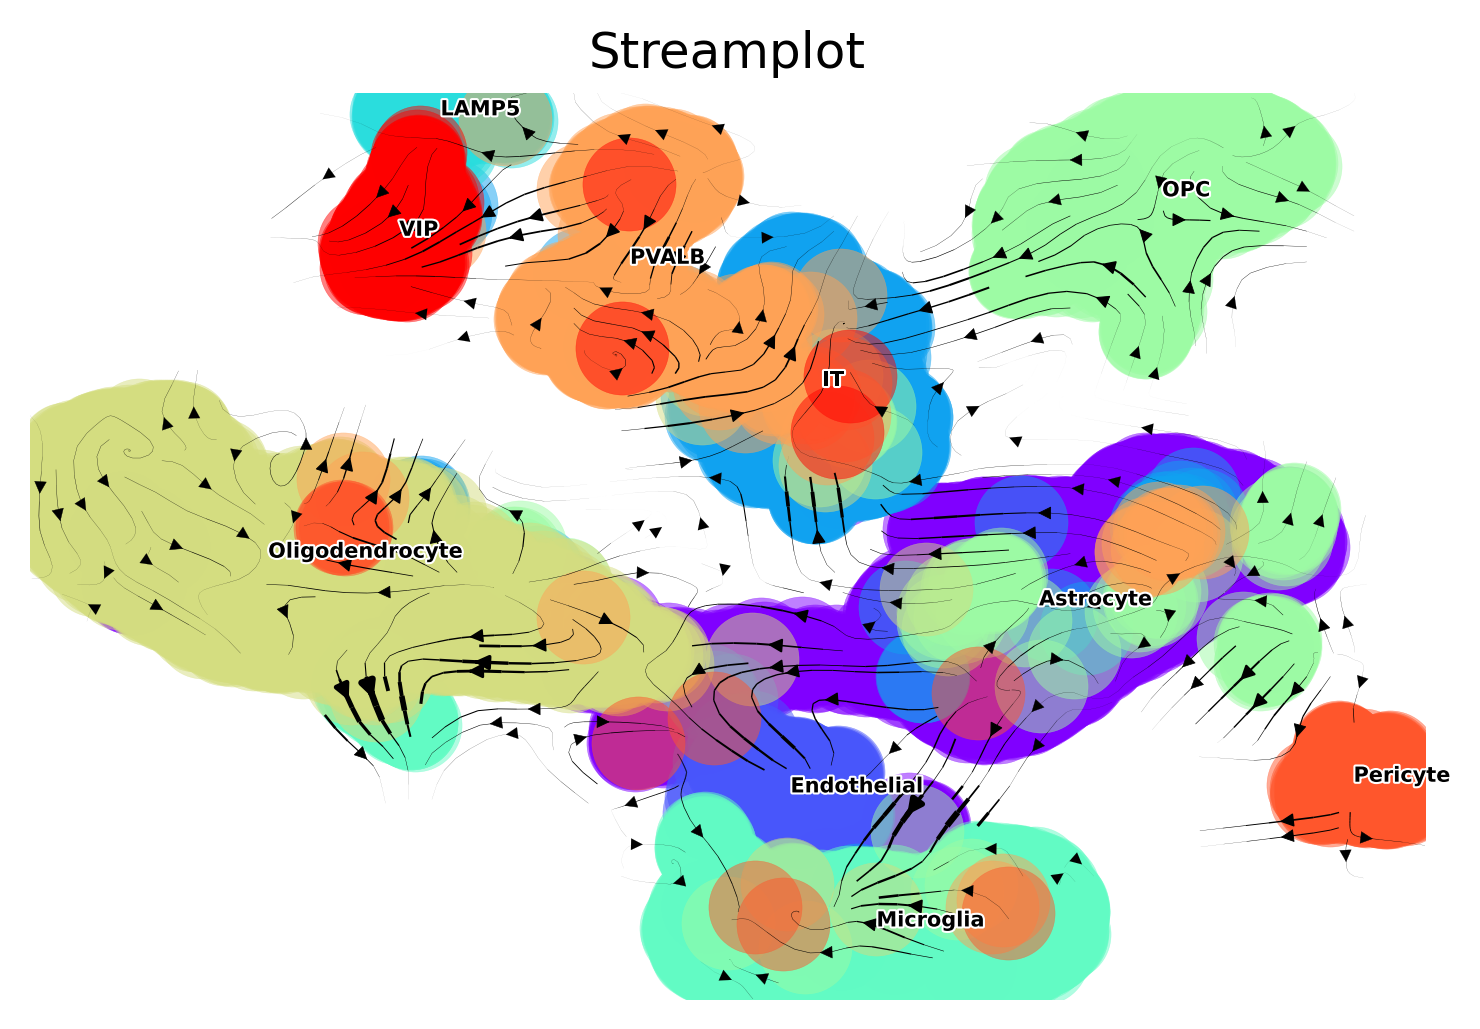

In [98]:
#----- create trajectory from grpah tree

via.draw_trajectory_gams(via_coarse=v0,via_fine= v0,embedding=umap, draw_all_curves=False)
via.via_streamplot(via_coarse=v0, embedding=umap)


'''
##In case we are unable to do a tsne/umap of our entire dataset due to high runtime,
it is possible to visualize Via (run on the full dataset) on a subset of cells used for visualization. 
One simply has to retain the indexes of the cells used for the embedding by changing "size" to
a number less than len(labels), you can choose to compute your embedding on just idx samples
idx = np.random.randint(len(v0.labels), size=len(v0.labels))

via.draw_trajectory_gams(via_coarse=v0, via_fine=v0, embedding=tsnem[idx], idx = idx, draw_all_curves=False)

##visualizeLINEAGE EVOLUTION PATHS when only a subset of the embedding points are available

via.draw_sc_evolution_trajectory_dijkstra(via_coarse=v0, via_fine=v0, embedding=tsnem[idx], idx = idx)
'''

2022-08-02 15:56:30.500103	Inside animated. File will be saved to location ./acc_combo/animation.gif
total number of stream lines 436


  0%|          | 0/27 [00:00<?, ?it/s]
MovieWriter imagemagick unavailable; using Pillow instead.


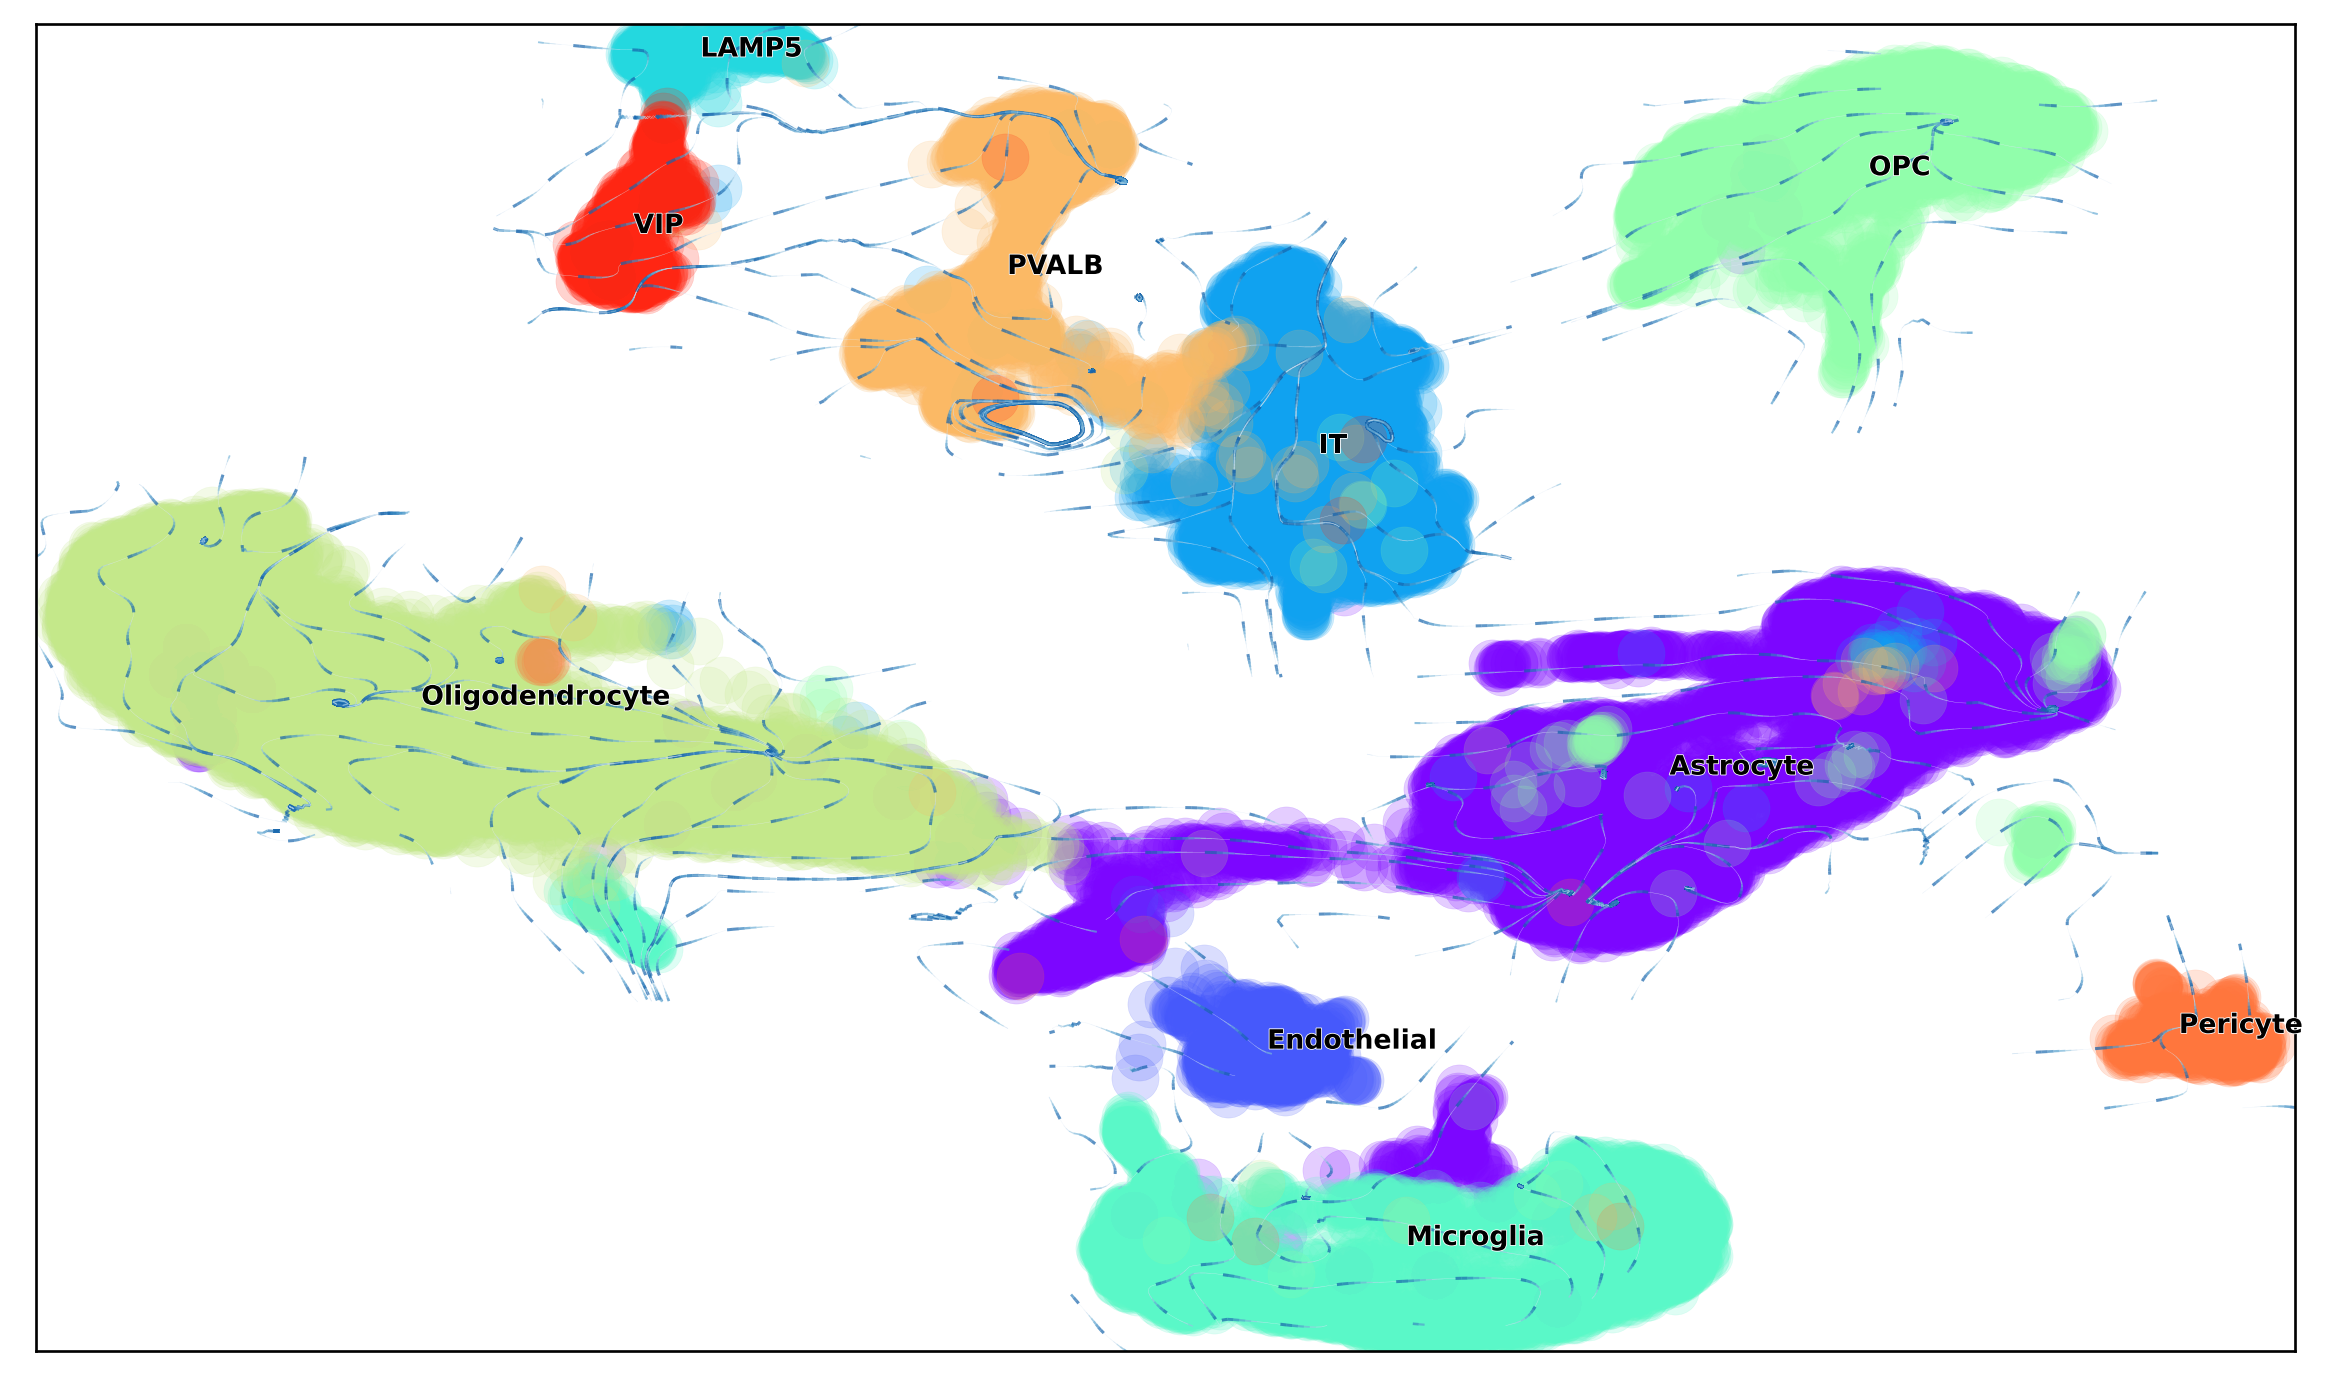

In [100]:
#----- visualize animated streamplot 

sc.settings.set_figure_params(dpi=120, facecolor='white')
via.animated_streamplot(v0, embedding=umap, scatter_size=200,
                        scatter_alpha=0.2,marker_edgewidth=0.15, density_grid=1, saveto='./acc_combo/animation.gif')

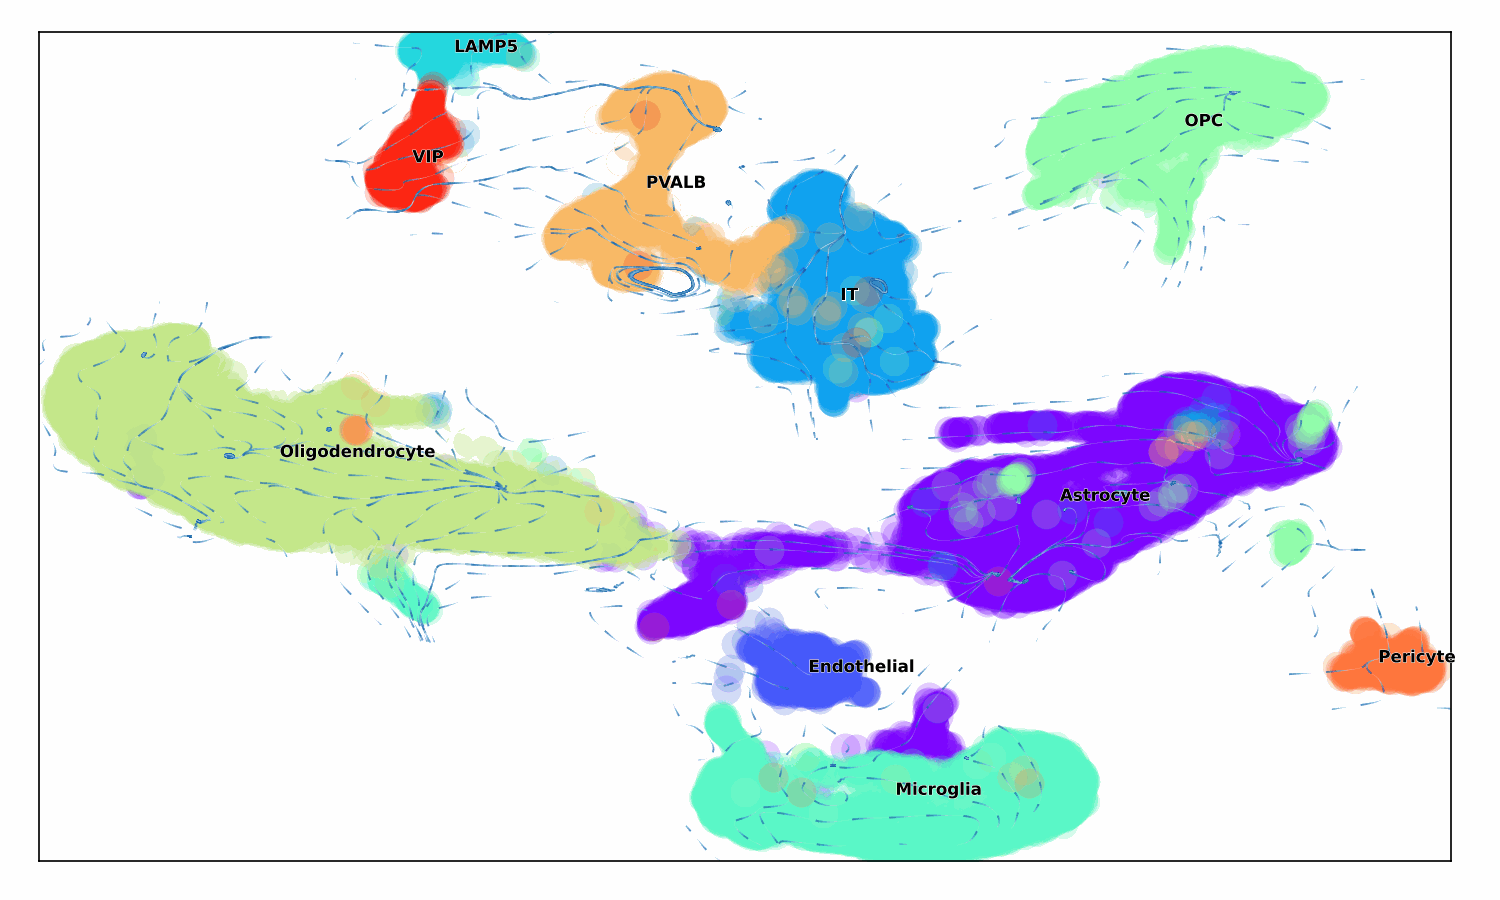

In [101]:
#------ save as a GIF object

from IPython.display import Image
with open('./acc_combo/animation.gif','rb') as file:
    display(Image(file.read()))

2022-08-02 16:22:59.191817	Cluster path on clustergraph starting from Root Cluster 42to Terminal Cluster 4
2022-08-02 16:22:59.191927	Cluster path on clustergraph starting from Root Cluster 42to Terminal Cluster 5
2022-08-02 16:22:59.191953	Cluster path on clustergraph starting from Root Cluster 42to Terminal Cluster 10
2022-08-02 16:22:59.191975	Cluster path on clustergraph starting from Root Cluster 42to Terminal Cluster 11
2022-08-02 16:22:59.191996	Cluster path on clustergraph starting from Root Cluster 42to Terminal Cluster 12
2022-08-02 16:22:59.192019	Cluster path on clustergraph starting from Root Cluster 42to Terminal Cluster 13
2022-08-02 16:22:59.192142	Cluster path on clustergraph starting from Root Cluster 42to Terminal Cluster 17
2022-08-02 16:22:59.192164	Cluster path on clustergraph starting from Root Cluster 42to Terminal Cluster 21
2022-08-02 16:22:59.192186	Cluster path on clustergraph starting from Root Cluster 42to Terminal Cluster 27
2022-08-02 16:22:59.192865	Clu

/sc/arion/projects/CommonMind/tereza/conda/envs/ViaEnv/lib/python3.7/site-packages/pyVIA/core.py:787: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:368
  path_orange = G_orange.get_shortest_paths(via_fine.root[ii], to=fst_i)[0]


2022-08-02 16:22:59.521010	Cluster level path on sc-knnGraph from Root Cluster 42 to Terminal Cluster 1 along path: [28, 28, 28, 19, 46, 57, 1, 1]
2022-08-02 16:22:59.556469	Cluster level path on sc-knnGraph from Root Cluster 42 to Terminal Cluster 2 along path: [28, 28, 28, 28, 19, 46, 18, 18, 18]
2022-08-02 16:22:59.586854	Cluster level path on sc-knnGraph from Root Cluster 42 to Terminal Cluster 3 along path: [28, 28, 28, 28, 28, 23, 1, 1, 1, 1]
2022-08-02 16:22:59.617698	Cluster level path on sc-knnGraph from Root Cluster 42 to Terminal Cluster 4 along path: [28, 28, 28, 19, 46, 2, 2, 2, 2, 2]
2022-08-02 16:22:59.648037	Cluster level path on sc-knnGraph from Root Cluster 42 to Terminal Cluster 5 along path: [28, 28, 28, 28, 38, 5, 5, 5, 5, 5]
2022-08-02 16:22:59.679649	Cluster level path on sc-knnGraph from Root Cluster 42 to Terminal Cluster 6 along path: [28, 28, 28, 19, 36, 25, 25, 25]
2022-08-02 16:22:59.710832	Cluster level path on sc-knnGraph from Root Cluster 42 to Terminal 

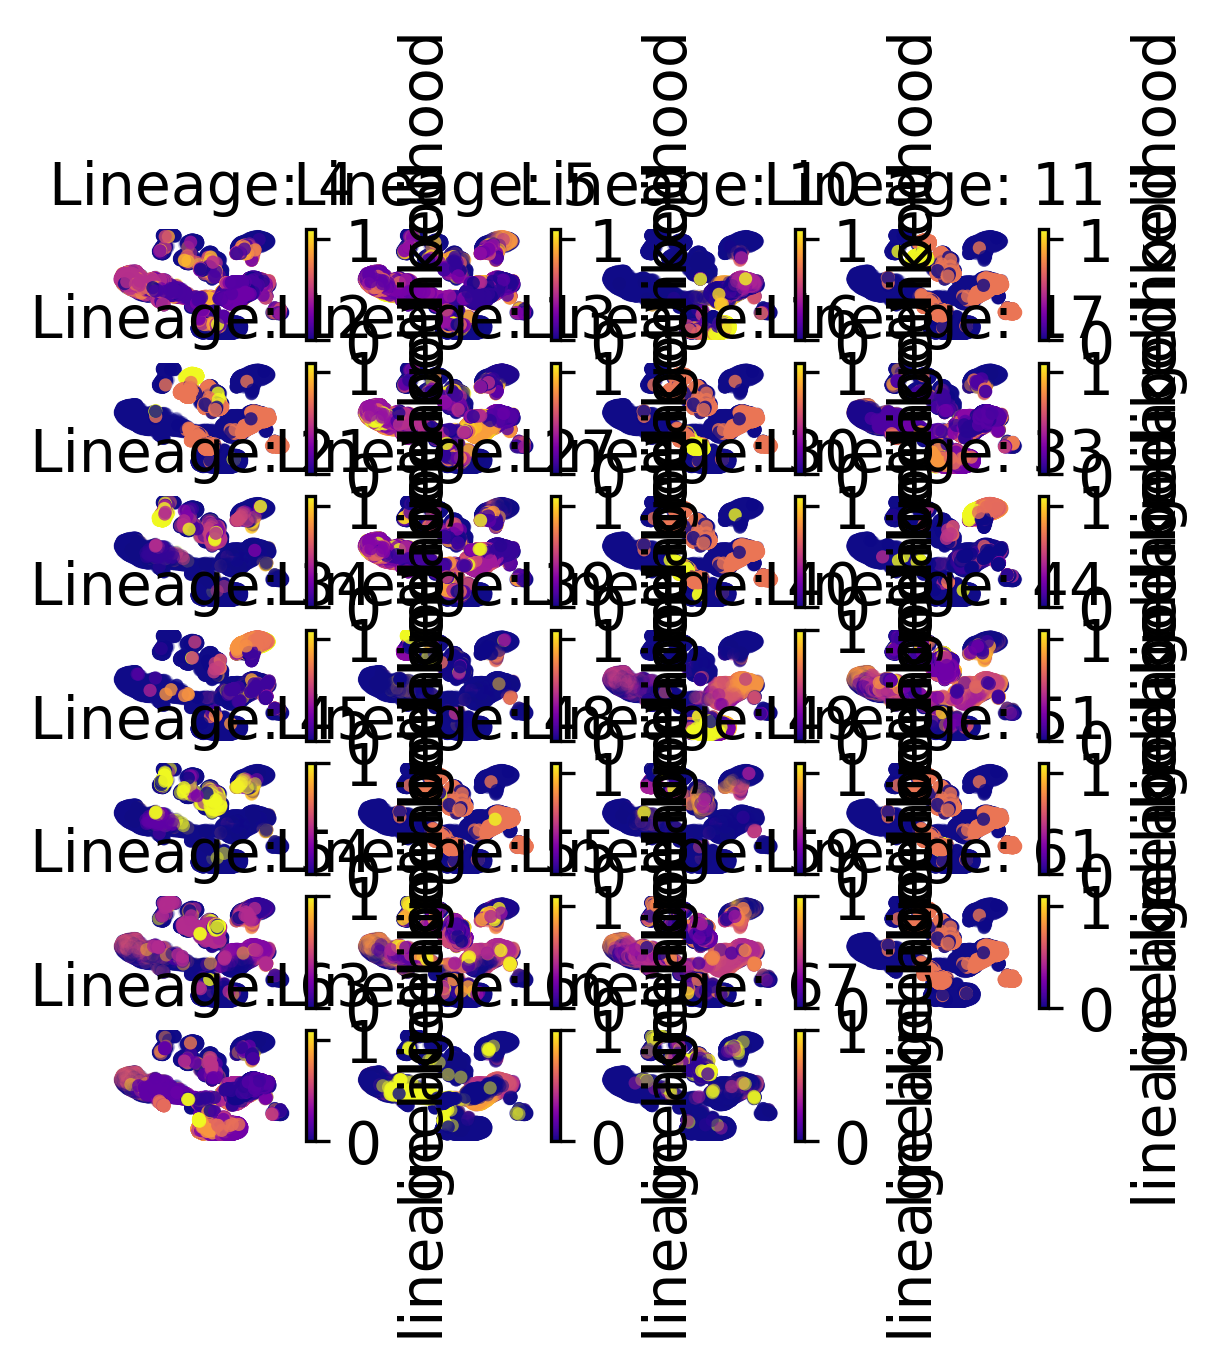

In [103]:
#----------------- Probabilistic pathway calculation

via.draw_sc_lineage_probability(via_coarse=v0,via_fine= v0, embedding=umap)